Import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
pwd

'/content'

Read data

In [3]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)


228813984/228813984 [==============================] - 2s 0us/step


In [4]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


Make train **data** set

In [5]:
batch_size = 32
img_height = 180
img_width = 180

https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory

In [6]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  image_size=(img_height, img_width),
  seed = 1,
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [7]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  image_size=(img_height, img_width),
   seed = 1,
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [8]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


Plot images

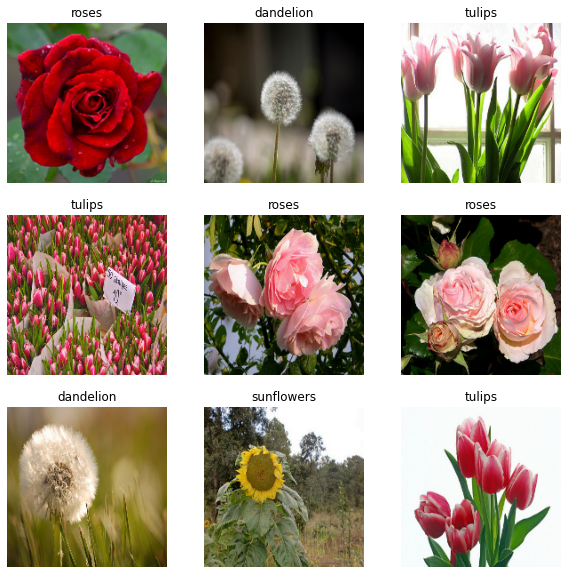

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [10]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


Create Model

https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D

In [11]:
num_classes = 5

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  # 3 : (3,3) kernel
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

Training

In [14]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 18s 74ms/step - loss: 1.2933 - accuracy: 0.4472 - val_loss: 1.1533 - val_accuracy: 0.5191
Epoch 2/10
92/92 [==============================] - 6s 60ms/step - loss: 0.9846 - accuracy: 0.6083 - val_loss: 1.0015 - val_accuracy: 0.5845
Epoch 3/10
92/92 [==============================] - 7s 72ms/step - loss: 0.7950 - accuracy: 0.6941 - val_loss: 0.9821 - val_accuracy: 0.6294
Epoch 4/10
92/92 [==============================] - 8s 78ms/step - loss: 0.5557 - accuracy: 0.7980 - val_loss: 1.0787 - val_accuracy: 0.6104
Epoch 5/10
92/92 [==============================] - 6s 59ms/step - loss: 0.3711 - accuracy: 0.8665 - val_loss: 1.1336 - val_accuracy: 0.6471
Epoch 6/10
92/92 [==============================] - 7s 69ms/step - loss: 0.2286 - accuracy: 0.9213 - val_loss: 1.2537 - val_accuracy: 0.6226
Epoch 7/10
92/92 [==============================] - 6s 60ms/step - loss: 0.1381 - accuracy: 0.9557 - val_loss: 1.4867 - val_accuracy: 0.6253
Epoch 8/10
9

Train Results

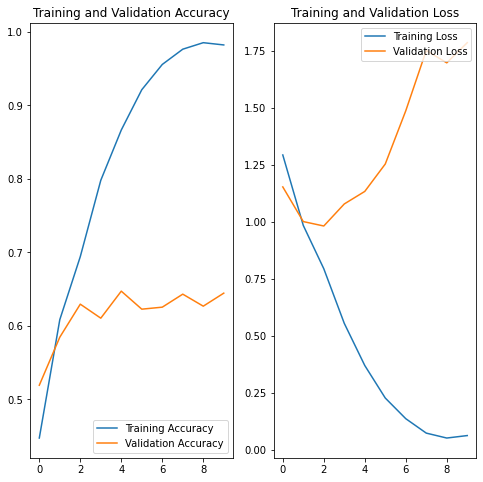

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [16]:
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = keras.preprocessing.image.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
print(img_array)
print()
img_array = tf.expand_dims(img_array, 0) # Create a batch
print(img_array)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

117948/117948 [==============================] - 0s 0us/step
[[[151. 189. 252.]
  [152. 190. 253.]
  [154. 190. 252.]
  ...
  [ 49.  68.  49.]
  [123. 124. 129.]
  [ 27.   6.  15.]]

 [[154. 192. 255.]
  [155. 191. 253.]
  [156. 192. 254.]
  ...
  [ 34.  61.  28.]
  [ 29.  75.  49.]
  [ 27.  71.  44.]]

 [[158. 194. 255.]
  [155. 191. 253.]
  [158. 192. 253.]
  ...
  [ 44.  53.  24.]
  [ 39.  62.  36.]
  [ 35.  57.  34.]]

 ...

 [[124. 166.  56.]
  [123. 164.  62.]
  [172. 209. 113.]
  ...
  [ 48.  60.  50.]
  [ 36.  50.  25.]
  [ 70.  87.  42.]]

 [[169. 219.  98.]
  [129. 175.  66.]
  [116. 160.  49.]
  ...
  [ 50.  62.  48.]
  [ 34.  51.  33.]
  [ 38.  56.  40.]]

 [[112. 168.  33.]
  [125. 176.  55.]
  [114. 162.  44.]
  ...
  [ 43.  56.  36.]
  [ 41.  55.  32.]
  [ 42.  56.  43.]]]

tf.Tensor(
[[[[151. 189. 252.]
   [152. 190. 253.]
   [154. 190. 252.]
   ...
   [ 49.  68.  49.]
   [123. 124. 129.]
   [ 27.   6.  15.]]

  [[154. 192. 255.]
   [155. 191. 253.]
   [156. 192. 254.]
